In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
results_path = "../reports"

model_list = ["UNet++", "AttentionUNet", "UNet", "VNet", "NoSkipUNet", "NoSkipVNet"]
anatomy_list = ["BUSI", "GLaS", "Heart", "Spleen"]
variant_list = ["lower", "low", "in-domain", "high", "higher"]

For texture variant: lower mean scores;
          UNet++ AttentionUNet      UNet      VNet NoSkipUNet NoSkipVNet
BUSI    0.210779      0.572541  0.560864  0.730226   0.644743     0.8085
GLaS    0.703495       0.69653  0.714557  0.741343   0.712531    0.73426
Heart   0.000224      0.033419  0.076453  0.784073   0.761279   0.871018
Spleen       0.0       0.21485  0.024814  0.001062    0.43442    0.31504
For texture variant: lower std scores;
          UNet++ AttentionUNet      UNet      VNet NoSkipUNet NoSkipVNet
BUSI    0.227502      0.307253  0.318226  0.276251    0.27838    0.18629
GLaS    0.204065      0.225175  0.203467  0.212532   0.202787   0.211647
Heart   0.003067      0.081761  0.111009  0.157066   0.160026   0.082761
Spleen       0.0       0.20725  0.072584  0.017384    0.27026   0.276217
For texture variant: low mean scores;
          UNet++ AttentionUNet      UNet      VNet NoSkipUNet NoSkipVNet
BUSI    0.235959      0.652197  0.676844  0.743612   0.683264   0.814704
GLaS   

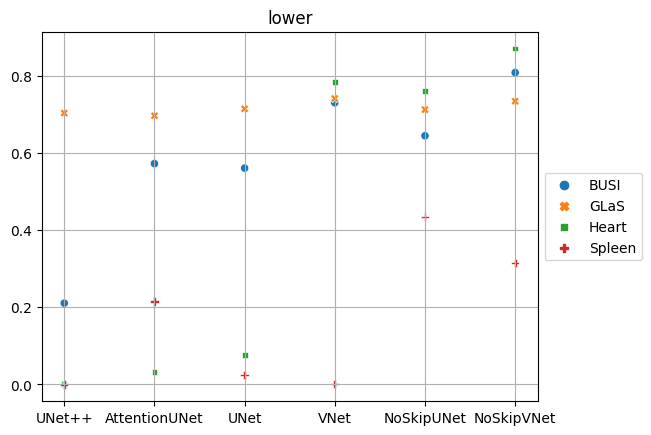

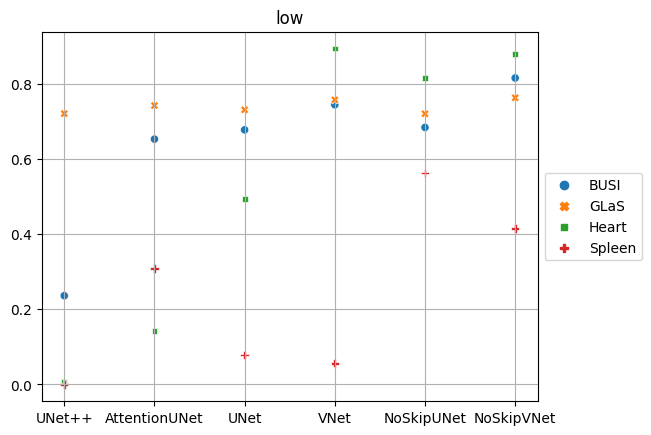

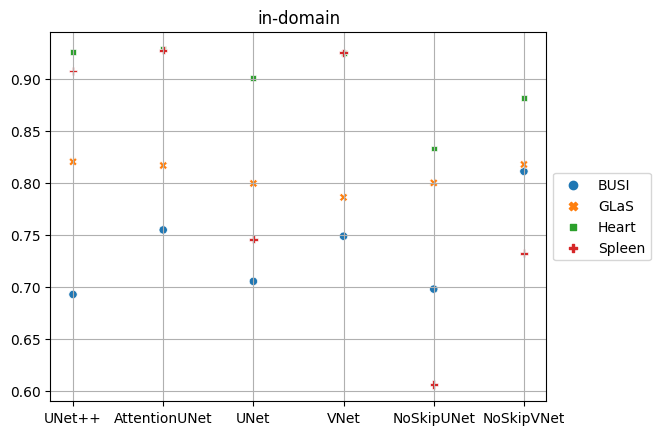

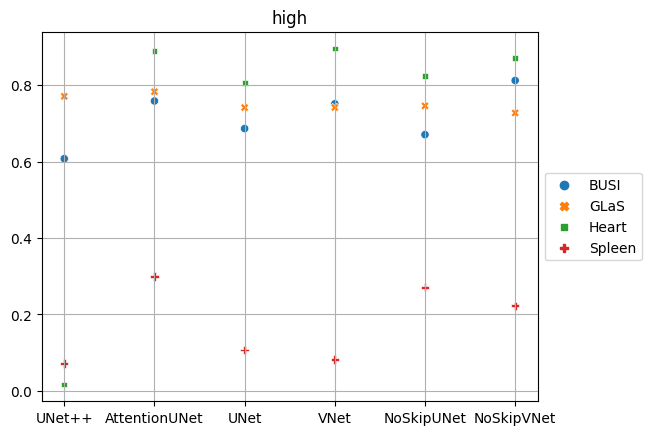

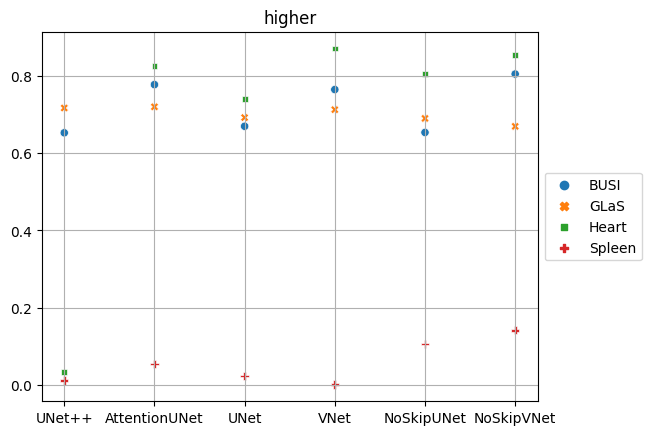

<Figure size 640x480 with 0 Axes>

In [8]:
dsc_mean_data = {}
dsc_std_data = {}

for texture_variant in variant_list:
    dsc_mean = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    dsc_sd = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    for anatomy in anatomy_list:
        for model_name in model_list:
            result_seed_1 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_1.csv")
            result_seed_2 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_2.csv")
            result_seed_3 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_3.csv")

            seed_1_data = pd.read_csv(result_seed_1)
            seed_1_data = seed_1_data.loc[seed_1_data['Set'] == "test"]

            seed_2_data = pd.read_csv(result_seed_2)
            seed_2_data = seed_2_data.loc[seed_2_data['Set'] == "test"]

            seed_3_data = pd.read_csv(result_seed_3)
            seed_3_data = seed_3_data.loc[seed_3_data['Set'] == "test"]

            dice_scores = np.hstack((seed_1_data["Dice"].to_numpy(), seed_2_data["Dice"].to_numpy(), seed_3_data["Dice"].to_numpy()))

            #print("For anatomy: " + anatomy + " and model: " + model_name + " and texture: " + texture_variant + ", dsc mean: " + str(np.mean(dice_scores)) + ", std: " + str(np.std(dice_scores)))

            dsc_mean[model_name][anatomy] = np.mean(dice_scores)
            dsc_sd[model_name][anatomy] = np.std(dice_scores)
    
    dsc_mean_data[texture_variant] = dsc_mean
    dsc_std_data[texture_variant] = dsc_sd
    
    print("For texture variant: " + str(texture_variant) + " mean scores;")
    print(dsc_mean)
    print("For texture variant: " + str(texture_variant) + " std scores;")
    print(dsc_sd)
    ax = sns.scatterplot(data=dsc_mean.T)
    ax.set_title(str(texture_variant))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.figure()


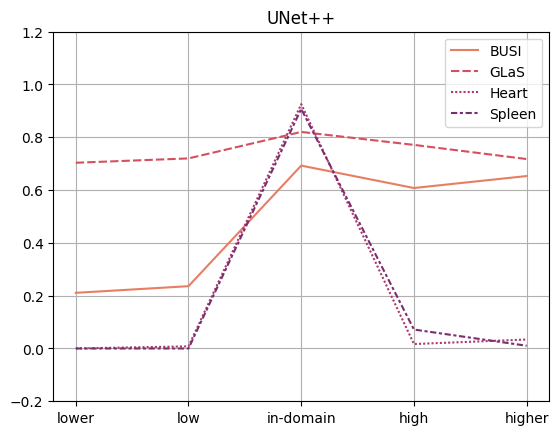

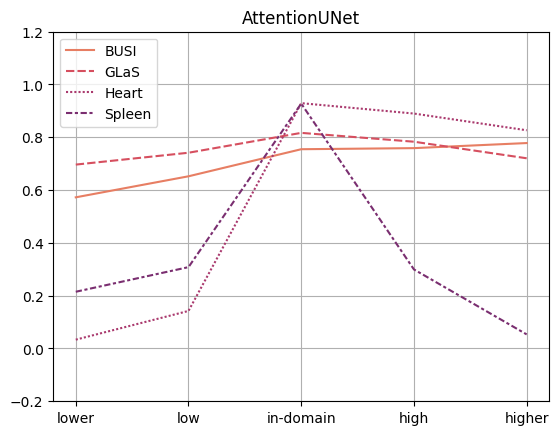

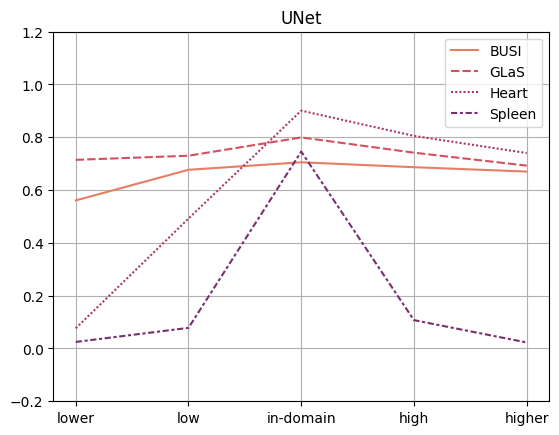

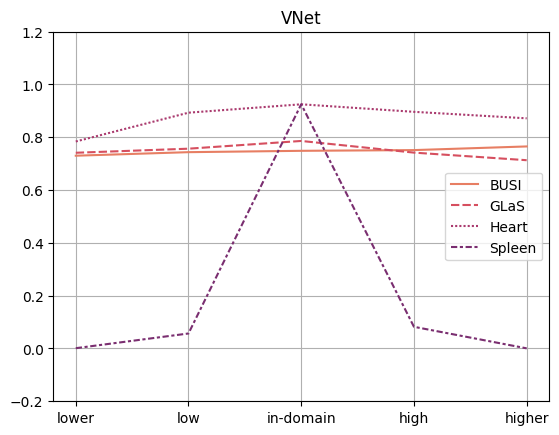

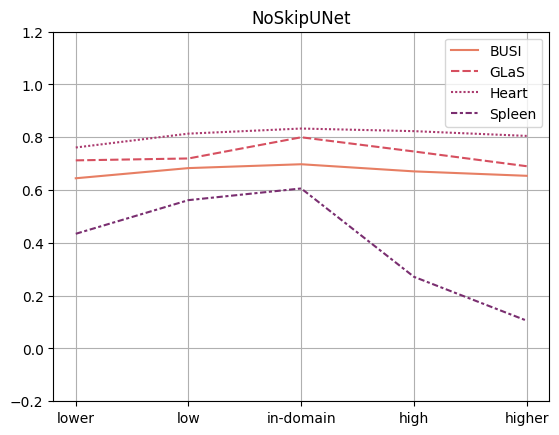

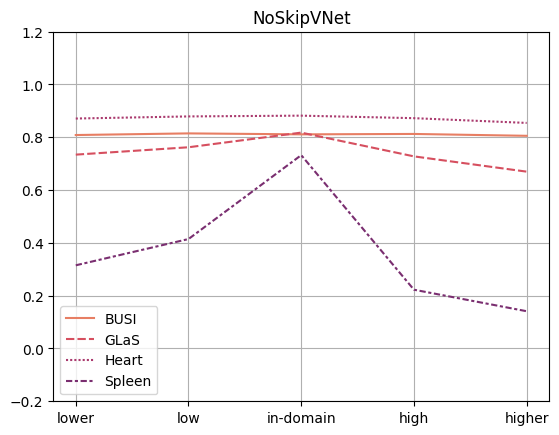

In [9]:
for model_type in model_list:
    results_by_image = {}
    for image_type in anatomy_list:
        mean_line = []
        for variant in variant_list:
            mean_line.append(dsc_mean_data[variant][model_type][image_type])

        results_by_image[image_type] = mean_line

    plt.figure()
    df = pd.DataFrame.from_dict(results_by_image, columns=variant_list, orient='index')
    sns.lineplot(data=df.T, palette='flare')
    plt.title(model_type)
    plt.grid(True)
    plt.ylim([-0.2, 1.2])

/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_9971/2571554904.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


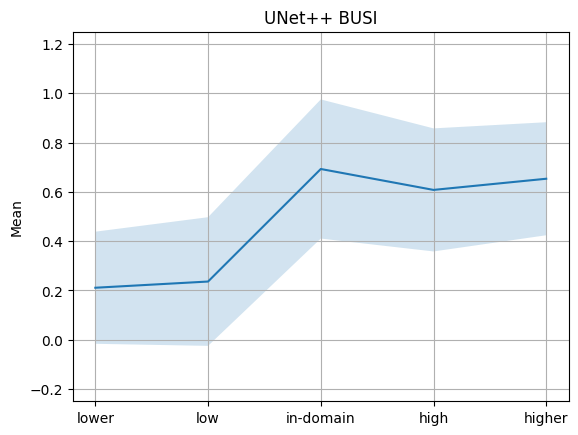

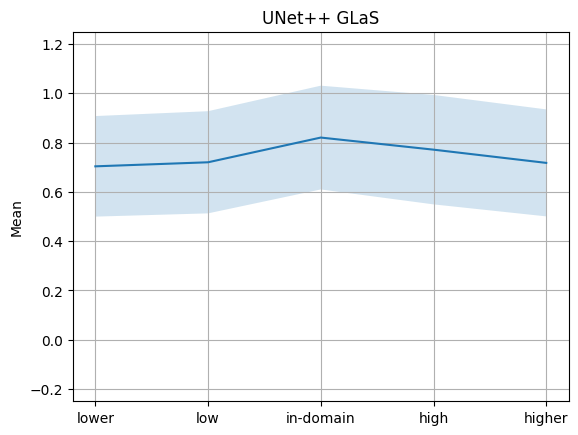

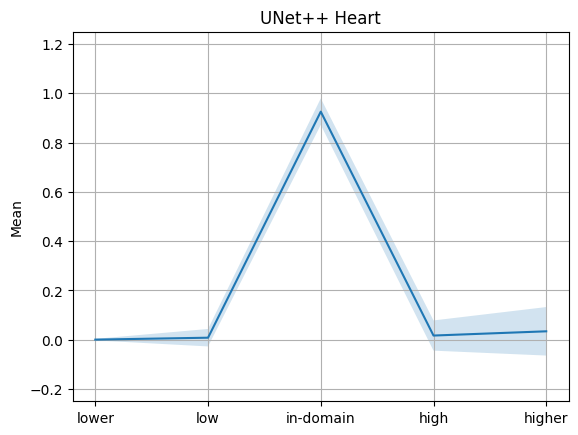

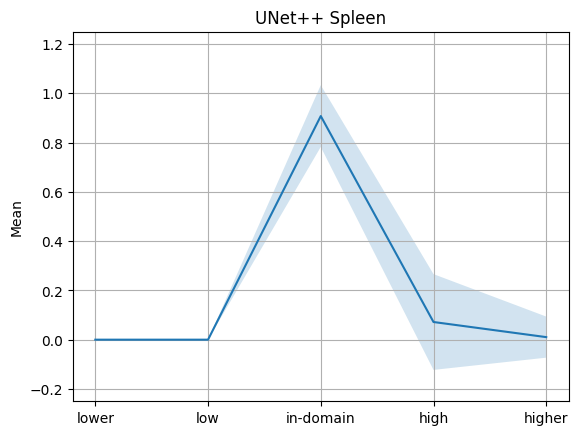

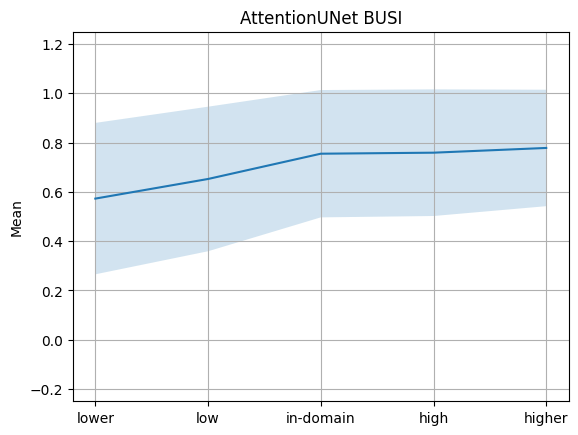

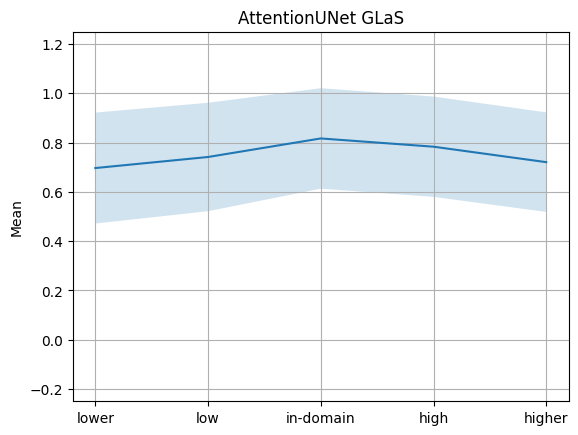

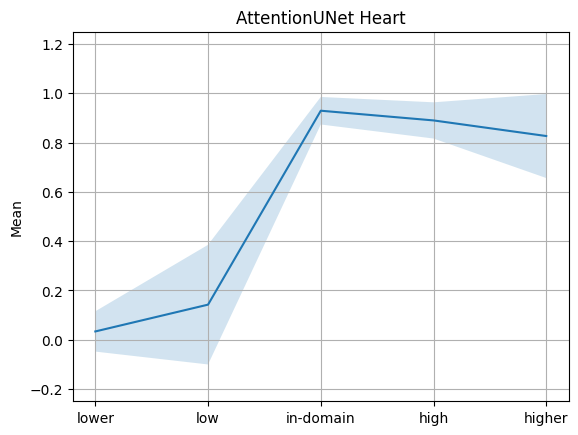

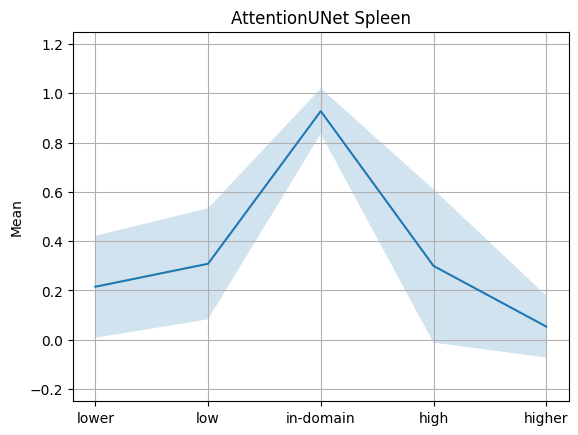

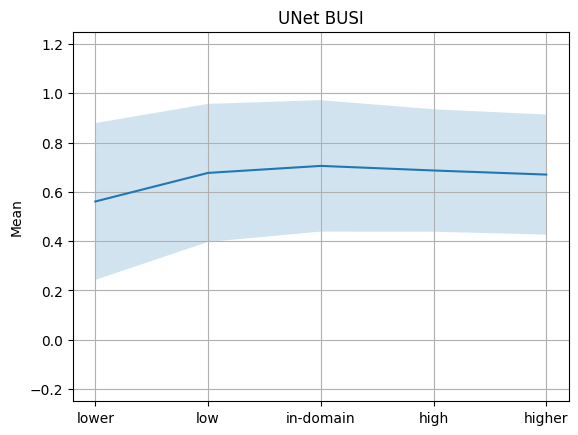

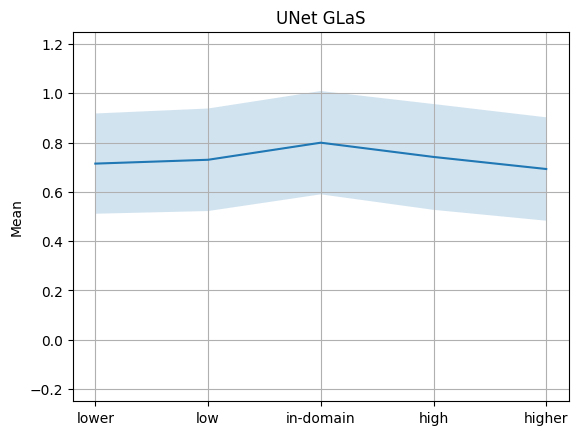

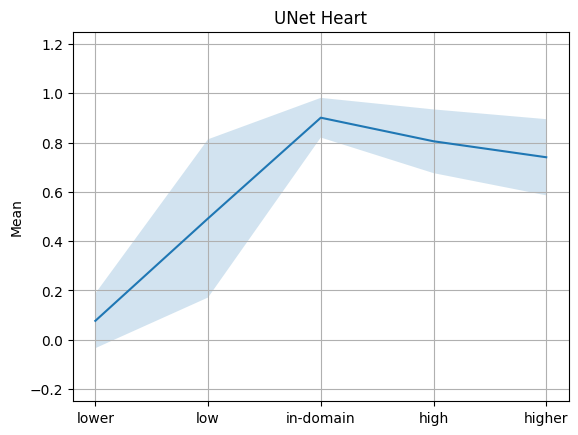

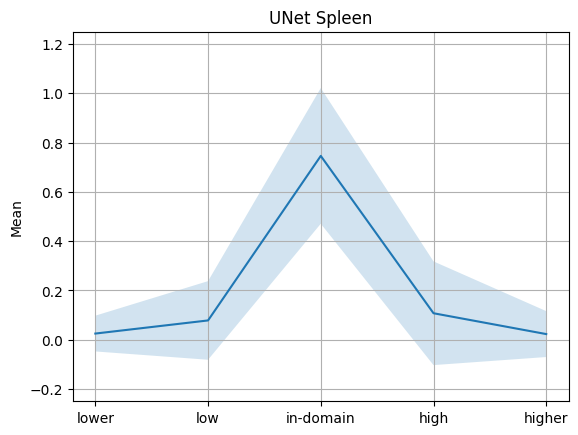

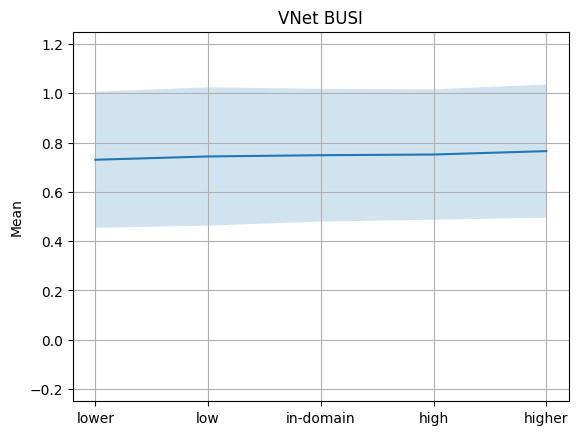

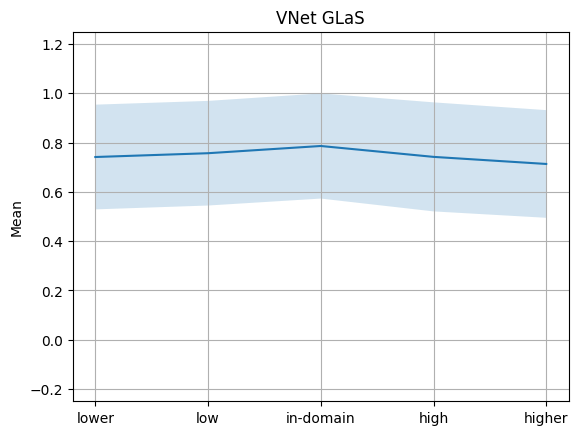

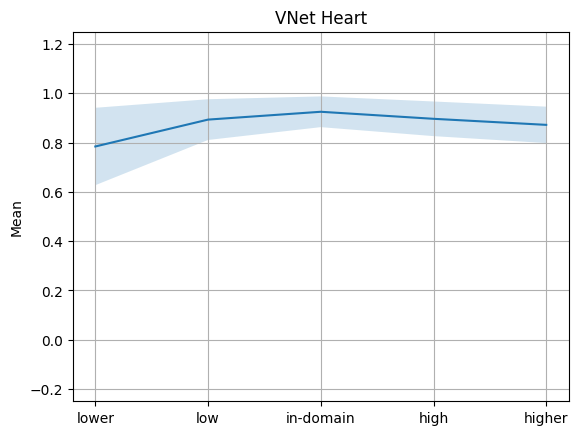

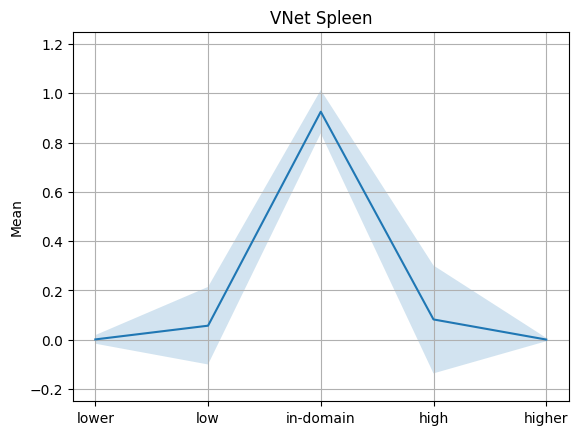

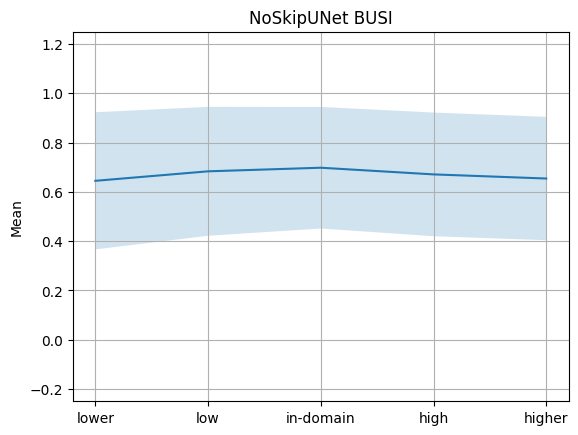

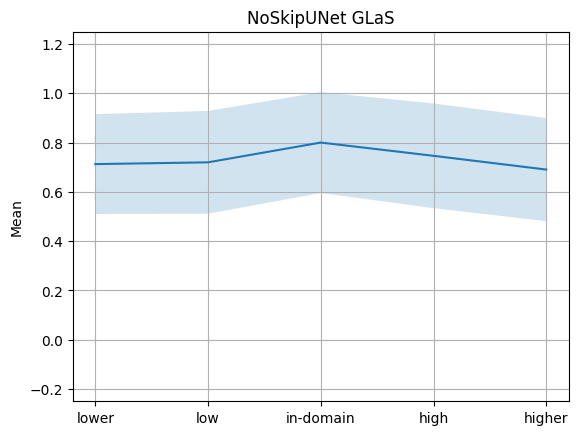

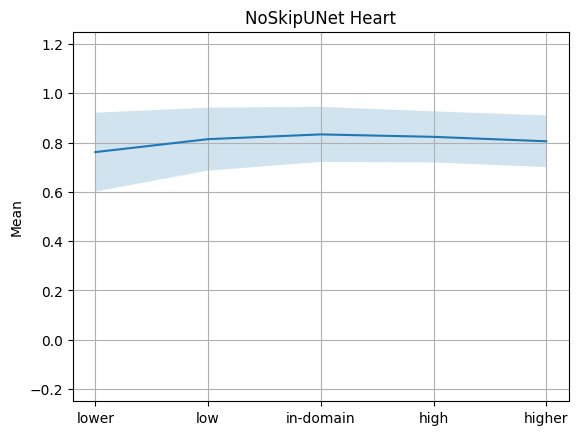

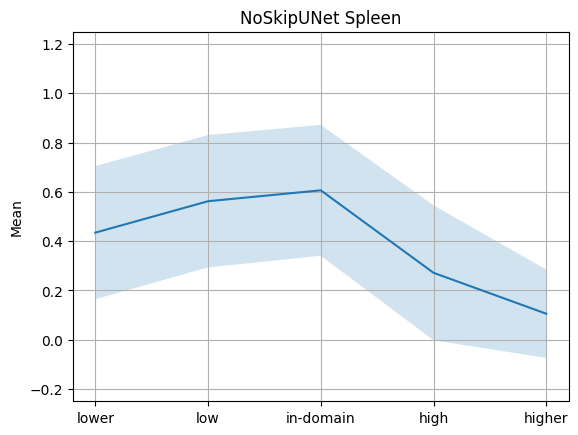

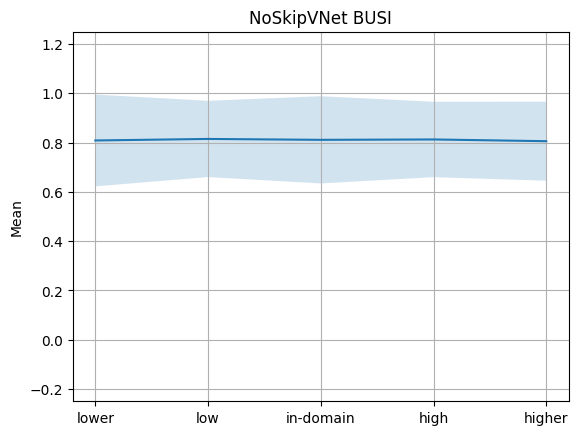

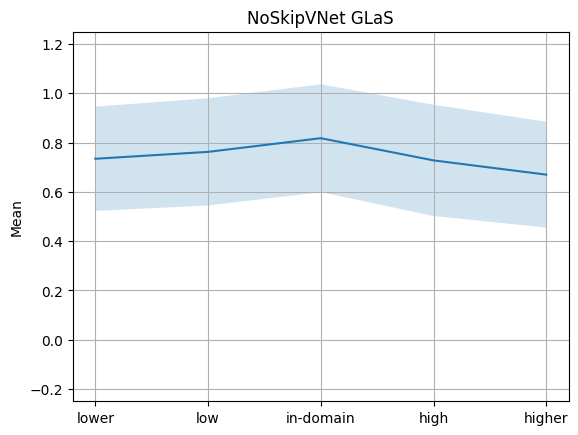

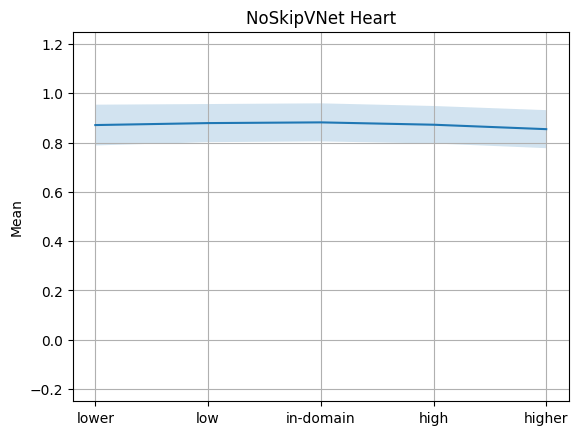

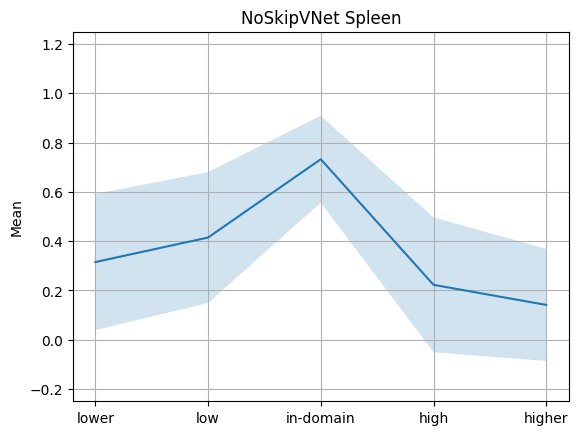

In [10]:
for model_type in model_list:
    for image_type in anatomy_list:
        results_by_image = {}
        mean_line = []
        std_lower = []
        std_higher = []
        for variant in variant_list:
            mean_line.append(dsc_mean_data[variant][model_type][image_type])
            std_lower.append(dsc_mean_data[variant][model_type][image_type] - dsc_std_data[variant][model_type][image_type])
            std_higher.append(dsc_mean_data[variant][model_type][image_type] + dsc_std_data[variant][model_type][image_type])

        results_by_image["Mean"] = mean_line
        results_by_image["Lower"] = std_lower
        results_by_image["Higher"] = std_higher

        plt.figure()
        df = pd.DataFrame.from_dict(results_by_image, columns=variant_list, orient='index')
        ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
        ax.fill_between(df.T.index, df.T.Lower, df.T.Higher, alpha=0.2)
        plt.title(model_type + " " + image_type)
        plt.grid(True)
        plt.ylim([-0.25, 1.25])